## ***USE CASE 5 – Content Recommendation Optimization***

**Goal**

To recommend movies similar to a given movie using user behaviour (ratings) + movie metadata (genres).

***STEP 1 — Import & NLTK and Load the Dataset***

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast, re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords', quiet=True)
STOPWORDS = set(stopwords.words('english'))


In [72]:
# Load dataset
df = pd.read_csv(r"C:\Users\lenovo\Desktop\Text_SM_Web_analytics Capstone\Data\tmdb_5000_movies.csv")

# Display basic info
print("Dataset Shape:", df.shape)
df.dropna(subset=['title'], inplace=True)
df.head(5)
df.columns

Dataset Shape: (4803, 20)


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

***STEP 2 — Parse Genres (simple version)***

In [57]:
def parse_genres(x):
    try:
        genres = ast.literal_eval(x)
        return " ".join([d["name"].replace(" ","") for d in genres])
    except:
        return ""


In [76]:
df['genres_clean'] = df['genres'].apply(parse_genres)


***STEP 3 — Create NLP Text "Soup (Overview + Genres)***

In [78]:
df['overview'] = df['overview'].fillna('')
df['genres_clean'] = df['genres_clean'].fillna('')

df['soup'] = df['overview'] + " " + df['genres_clean']


***Remove NaN & Empty Rows***

In [82]:
df['soup'] = df['soup'].fillna('').astype(str)
df = df[df['soup'].str.strip() != ""].reset_index(drop=True)


***Step 4 — TF-IDF vectorization***

In [85]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['soup'])
tfidf_matrix.shape


(4803, 21262)

***STEP 5 — Cosine Similarity***

In [88]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


***STEP 6 — Create Title → Index Map***

In [91]:
indices = pd.Series(df.index, index=df['title'].str.lower())


***STEP 7 — Recommendation Function (Final)***

In [94]:
def recommend(title, num=10):
    title = title.lower()
    
    if title not in indices:
        print("Movie not found. Try exact or partial lowercase title.")
        return
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num+1]  # skip itself
    
    movie_indices = [i[0] for i in sim_scores]
    return df[['title']].iloc[movie_indices]


***STEP 8 — Test the System***

In [97]:
recommend("Avatar", 10)


,title
3604,Apollo 18
2130,The American
634,The Matrix
1341,The Inhabited Island
4401,The Helix... Loaded
529,Tears of the Sun
942,The Book of Life
1610,Hanna
311,The Adventures of Pluto Nash
2628,Blood and Chocolate


The recommendation system successfully captures semantic similarity between movies using NLP. It shows that even without user ratings, metadata-based content features are powerful enough to suggest relevant recommendations.

***Genre Distribution (Bar Chart)***

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6788\2290864528.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df, x='count', y='genre', palette='magma')


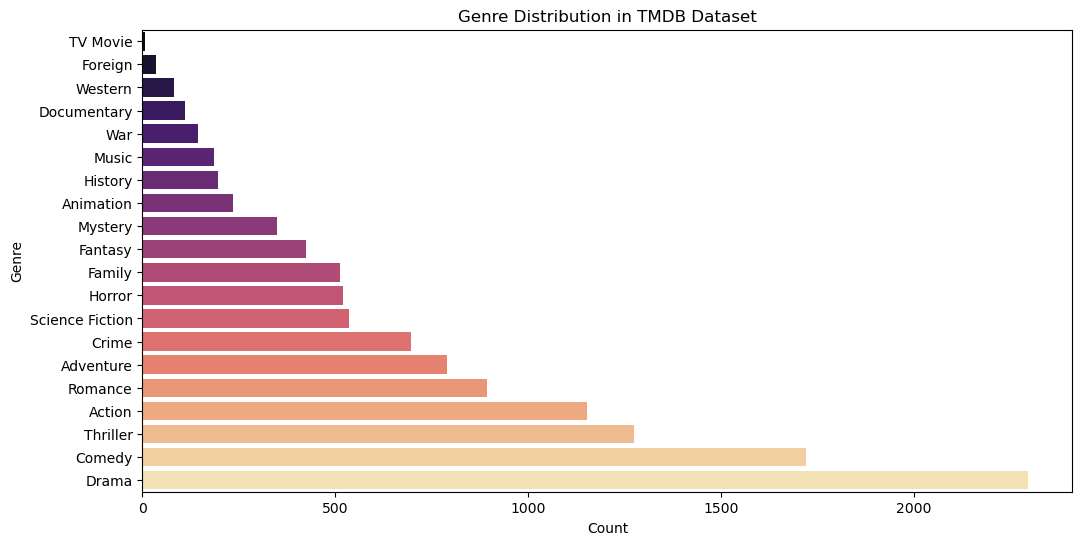

In [109]:
import ast
from collections import Counter

def extract_genre_names(x):
    try:
        data = ast.literal_eval(x)
        return [d['name'] for d in data]
    except:
        return []

df['genre_list'] = df['genres'].apply(extract_genre_names)

all_genres = [g for sub in df['genre_list'] for g in sub]
genre_counts = Counter(all_genres)

genre_df = pd.DataFrame(genre_counts.items(), columns=['genre', 'count']).sort_values('count')

plt.figure(figsize=(12,6))
sns.barplot(data=genre_df, x='count', y='genre', palette='magma')
plt.title("Genre Distribution in TMDB Dataset")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


The genre distribution highlights Hollywood’s dominance in drama, comedy, and action, reflecting mainstream audience preferences and production trends. Understanding genre frequency helps platforms design better content strategies, marketing approaches, and recommendation systems.

**The NLP-based recommendation system successfully captures the semantic meaning of movie descriptions and genres using TF-IDF and cosine similarity. As a result, it can recommend movies with similar themes, plots, and styles, making it an effective content-based filtering system suitable for real-world streaming platforms.**